In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms
from rdkit.Chem.Draw import IPythonConsole
AllChem.SetPreferCoordGen(True)

In [2]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [3]:
import py3Dmol

In [4]:
mol = Chem.MolFromSmiles('C=CC(=O)OC')

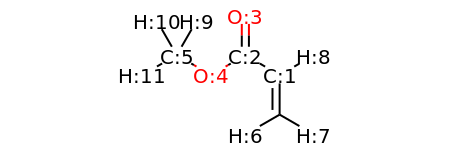

In [5]:
hmol = Chem.AddHs(mol)
mol_with_atom_index(hmol)

In [6]:
AllChem.EmbedMolecule(hmol)
IPythonConsole.drawMol3D(hmol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
rdMolTransforms.GetDihedralDeg(hmol.GetConformer(0), 0, 1, 2, 3)

179.99918297409627

In [8]:
confs = []
import copy
from IPython.display import display
for deg in range(0, 360, 10):

    rdMolTransforms.SetDihedralDeg(hmol.GetConformer(0), 0, 1, 2, 3, deg)
    mol = copy.deepcopy(hmol)
    confs.append(mol)
    if deg % 30 == 0:
        print(deg)
        display(IPythonConsole.drawMol3D(hmol))

0


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

30


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

60


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

90


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

120


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

150


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

180


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

210


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

240


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

270


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

300


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

330


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

None

In [9]:
from psikit import Psikit
pk = Psikit()

In [10]:
resp_charges = []
dihedral_energies = []
dihedral_degrees = [i for i in range(0, 360, 10)]
pk.read_from_smiles('C=CC(=O)OC')
pk.optimize(basis_sets="scf/sto-3g")
pk.optimize(basis_sets="b3lyp/6-31G*")

for deg in dihedral_degrees:
    conformer = pk.mol.GetConformer(0)
    rdMolTransforms.SetDihedralDeg(conformer, 0, 1, 2, 3, deg)
    degy = pk.energy(basis_sets="b3lyp/6-31g*")
    print(deg, degy)
    try:
        resp_chage = pk.calc_resp_charges()
    except:
        resp_chage = []
    dihedral_energies.append(degy)
    resp_charges.append(resp_chage)

Optimizer: Optimization complete!
Optimizer: Optimization complete!
0 -306.4664671988334
10 -306.4661685160852
20 -306.4652912434956
30 -306.46392597558355
40 -306.46221004515115
50 -306.4603256823502
60 -306.4585016217785
70 -306.4569816427162
80 -306.4559863294905
90 -306.4556871351432
100 -306.45612777747436
110 -306.45723766665077
120 -306.45884826472906
130 -306.4607129715492
140 -306.4625814332829
150 -306.46423792159135
160 -306.46551916875075
170 -306.4663230682071
180 -306.4665970127409
190 -306.46631883927336
200 -306.4655118279453
210 -306.46422915660736
220 -306.46257314518425
230 -306.46070675931935
240 -306.4588449515096
250 -306.4572373342053
260 -306.45612993519217
270 -306.455690925566
280 -306.45599071201934
290 -306.4569855833913
300 -306.45850460984167
310 -306.4603274750086
320 -306.46221081912967
330 -306.4639259824197
340 -306.4652909556084
350 -306.466168221301


In [20]:
import numpy as np

In [21]:
dihedral_energies_array = np.array(dihedral_energies)

In [22]:
rerative = (dihedral_energies_array - dihedral_energies_array.min()) * pk.psi4.constants.hartree2kcalmol

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Relative energy kcal/mol')

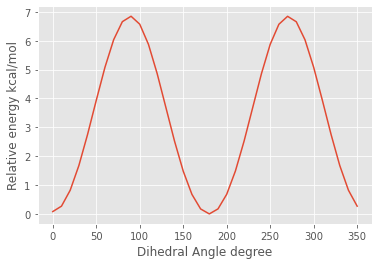

In [28]:
plt.plot(dihedral_degrees, rerative)
plt.xlabel('Dihedral Angle degree')
plt.ylabel('Relative energy kcal/mol')

In [25]:
chargeofO = []
chargeofC = []
for respc in resp_charges:
    try:
        oc = respc[3]
        cc = respc[0]
    except:
        oc = None
        cc = None
    chargeofO.append(oc)
    chargeofC.append(cc)

Text(0, 0.5, 'RESP Charge of Caron0')

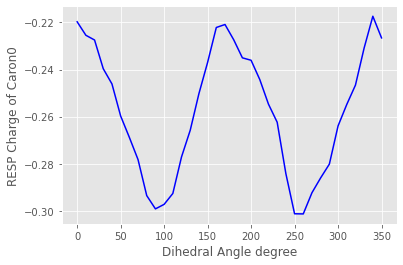

In [26]:
plt.plot(dihedral_degrees, chargeofC, c='b')
plt.xlabel('Dihedral Angle degree')
plt.ylabel('RESP Charge of Caron_0')

In [18]:
plt.plot(dihedral_degrees, chargeofO, c='b')
plt.xlabel('Dihedral Angle degree')
plt.ylabel('RESP Charge of Oxygen_')

-0.2197554791121001 0
-0.22546639462261134 10
-0.22748453026885992 20
-0.23966308064488032 30
-0.24612716742016771 40
-0.25973807158327883 50
-0.26879981847526174 60
-0.2782436509298841 70
-0.2935261176358955 80
-0.29915569603697634 90
-0.29723202343440797 100
-0.29261598601586414 110
-0.27709502631691196 120
-0.2657938750127841 130
-0.2502509197323011 140
-0.23697490413226155 150
-0.22216599104406917 160
-0.22090016586002373 170
-0.22737372923956456 180
-0.23504522168916253 190
-0.23607968258769527 200
-0.24427533302704219 210
-0.25471935667353574 220
-0.26238156808759444 230
-0.28420027350766175 240
-0.3012323012514356 250
-0.3012936774869173 260
-0.29229779745275414 270
-0.28599033928337697 280
-0.28015993546139906 290
-0.26395273269771485 300
-0.2548554201929656 310
-0.24663456846429835 320
-0.23086215589584383 330
-0.21739423945430714 340
-0.22658279677694673 350


Text(0, 0.5, 'RESP Charge of Oxygen3')

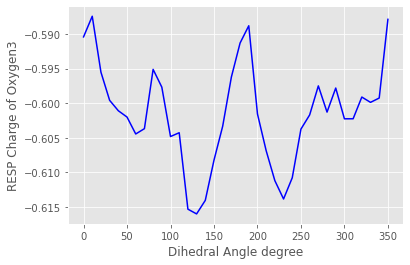

In [27]:
plt.plot(dihedral_degrees, chargeofO, c='b')
plt.xlabel('Dihedral Angle degree')
plt.ylabel('RESP Charge of Oxygen3')